In this exercise, we will build a linear regression model on Boston housing data set which is an inbuilt data in the scikit-learn library of Python. However, before we go down the path of building a model, let’s talk about some of the basic steps in any machine learning model in Python

In most cases, any of the machine learning algorithm in sklearn library will follow the following steps-

#### Split original data into features and label. In other words,  create dependent variable and set of independent variables in two different arrays separately. Please note this requirement exists only for the supervised learning ( where a dependent variable is present). For unsupervised learning, we don’t have a dependent variable and hence there is no need to split the data into features and label

#### Scale or Normalize the features and label data. Please note that this is not a necessity for all algorithms and/or datasets. Also we are assuming that all the data cleaning and feature engineering  such as missing value treatment, outlier treatment, bogus values fixes and dummy coding of the categorical variables have been done before doing this step

#### Create training and test data sets from the original data. Training data set will be used for training the model whereas the test data set will be used for validating the accuracy or the prediction power of the model on a new dataset. We would need to split both the features and labels into the training and the test split.

#### Create an instance of the model object that will be used for the modelling exercise. This process is called “Instantiation”.  In simpler words, during this process we are loading the model package necessary to build a model.

#### “Fit” the model instance on the training data. During this step, the model is leveraging both the features and the label information provided in the training data to connect the features to label. Please note that we are going with all the default option during fitting of the model.  As you get more expertise you may want to play with some parameter optimization, however we are just going with the defaults for now.

#### “Predict” using the model instance on test data. During this step, the model is only using the features information to predict the label.

#### Based on the predictions generated on the test data, we generate key performance indicators of  model performance. This generally includes metrics such as Precision, Recall F score, Confusion Matrix, Accuracy, Mean Square Error (MSE), Root Mean Square Error (RMSE), Mean Absolute Error (MAE), Area Under the Curve (AUC), Mean Absolute Percentage error (MAPE) etc.

#### Once the model performance is evaluated and its deemed to be satisfactory for the purpose of the business uses, we implement the model for new unseen data

import the necessary packages including the train_test_split package which will be used for splitting the data into the training and test samples

In [5]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

Import interactive shell magic command which will help us print many statements on the same line

In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Import the Boston Housing dataset from sklearn library. Python has many such inbuilt datasets for various purposes. Most of the data sets in such libraries are stored as dictionary format.

In [12]:
from sklearn import datasets
boston = datasets.load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Find out more about this data set by typing the below command

In [13]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Let’s do some more exploratory analysis such as- printing the features,  the label shape of the data etc.

In [14]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()
boston_df['House_Price'] = boston.target
boston_df.head()
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Since we are building a linear regression model it may be helpful to generate the correlation matrix and then the correlation heatmap using the seaborn library

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x5400408ec8>)

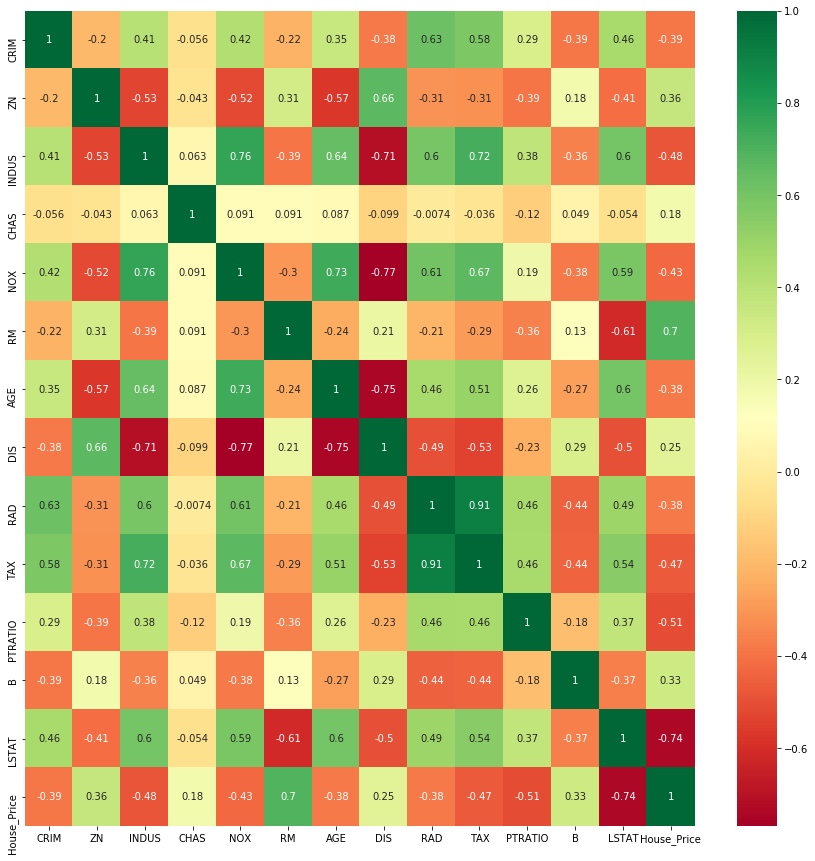

In [21]:
x = boston_df.corr()
x
plt.subplots (figsize = (15,15))
sns.heatmap(x, cmap = "RdYlGn", annot=True)
plt.show()

### Create features and labels using Pandas  ‘.drop() ‘ method to drop certain variables. In this case we are dropping the house price as this is the label.

In [25]:
x = boston_df.drop("House_Price", axis = 1)
y = boston_df["House_Price"]
x.head()
y.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: House_Price, dtype: float64

### Split the data into the training and test datasets

In [30]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = 1)

train_x.shape

test_x.shape

train_y.shape

test_y.shape



(379, 13)

(127, 13)

(379,)

(127,)

### Instantiate– import the model object and create an instance of the model

In [31]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Fit – Fit the model instant on the training data using ‘ .fit() ‘ method. Note that we are passing on both the features and label here

In [32]:
lm.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predict– Predict using the model instant and training done on the training data using ‘ .predict() ‘ method. Please note that here we are only passing on the features and having the model predict the values of the label.


In [35]:
predict_test = lm.predict(test_x)
#predict_test

### We can find out many important things such as the coefficients of the parameters using the fitted object methods. In the below case, we are getting the coefficient values for all the feature parameters in the model.

In [39]:
print(lm.coef_)
df_m = pd.DataFrame({'features':x.columns, 'coeff':lm.coef_})
df_m = df_m.sort_values(by=['coeff'])
df_m

[-1.14428903e-01  5.71299780e-02  3.83002824e-02  2.42854641e+00
 -2.12326236e+01  2.87723416e+00  6.91118094e-03 -1.47158266e+00
  3.05784197e-01 -1.06750361e-02 -9.96138270e-01  6.27746234e-03
 -5.57414427e-01]


,features,coeff
4,NOX,-21.232624
7,DIS,-1.471583
10,PTRATIO,-0.996138
12,LSTAT,-0.557414
0,CRIM,-0.114429
9,TAX,-0.010675
11,B,0.006277
6,AGE,0.006911
2,INDUS,0.038300
1,ZN,0.057130


### We can plot the feature importance in a bar chart format as well using the ‘.plot’ method of the Pandas dataframe.  Please note that we can also specify the figure size and the X and Y variables in the plot method under the different parameters possible

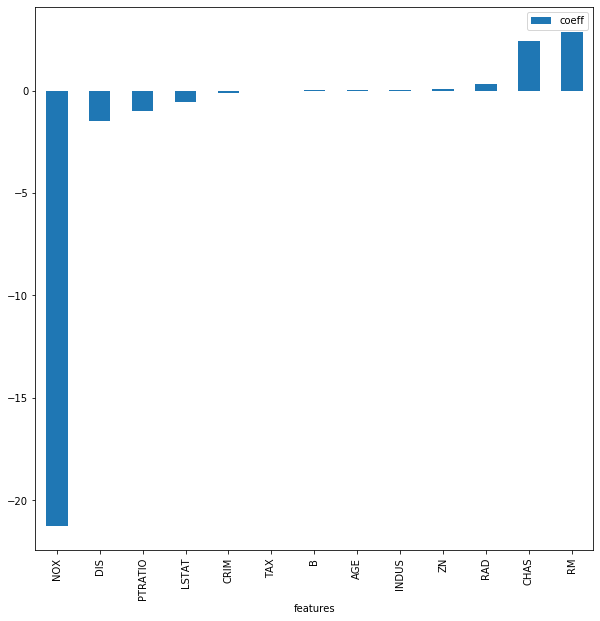

In [46]:
df_m.plot(x='features', y='coeff', kind='bar', figsize = (10,10))
plt.show()

### Let’s now generate some of the model performance metrics  such as R2, MSE and MAE. All of these model performance metrics can be generated using the scikit-learn inbuilt packages such as ‘metrics’.

In [48]:
("RSquare val for Test data is - ")
np.round(lm.score(test_x,test_y)*100,0)

("RSquare val for Train data is - ")
np.round(lm.score(train_x,train_y)*100,0)

'RSquare val for Test data is - '

78.0

'RSquare val for Train data is - '

72.0

In [50]:
from sklearn import metrics
print("MSE for test data is")
np.round(metrics.mean_squared_error(test_y, predict_test),0)

MSE for test data is


22.0

In [51]:
from sklearn.metrics import mean_absolute_error
print("MAE for test data is")
np.round(mean_absolute_error(test_y, predict_test),0)

MAE for test data is


4.0

### In the last step we are appending the predicted house prices into the original data and computing the error in estimation for the test data.

In [52]:
fdf = pd.concat([test_x,test_y],1)
fdf['Predicted'] = np.round(predict_test,1)
fdf['Prediction_Error'] = fdf['House_Price'] - fdf['Predicted']
fdf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price,Predicted,Prediction_Error
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53,28.2,32.4,-4.2
343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18,23.9,28.0,-4.1
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,16.6,18.1,-1.5
67,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4.0,345.0,18.9,396.21,8.10,22.0,21.6,0.4
362,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19,20.8,18.9,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84,26.6,27.3,-0.7
361,3.83684,0.0,18.10,0.0,0.770,6.251,91.1,2.2955,24.0,666.0,20.2,350.65,14.19,19.9,18.7,1.2
289,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6.0,293.0,16.6,371.72,9.51,24.8,27.3,-2.5
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2,21.2,0.0


As you can see from the above metrics that overall this plain vanilla regression model is doing a decent job. However, it can be significantly improved upon by either doing feature engineering such as binning, multicollinearity and heteroscedasticity fixes etc. or by leveraging more robust techniques such as Elastic Net, Ridge Regression or SGD Regression, Non Linear models.

### Using statmodels to build Linear Regression

In [54]:
import statsmodels.formula.api as snf

In [55]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [57]:
model = snf.ols('House_Price ~ CRIM+ZN+INDUS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', data = boston_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            House_Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Wed, 29 Apr 2020   Prob (F-statistic):          7.30e-134
Time:                        06:50:46   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8920      5.147      7.168      0.0

### Remove Insignificant variables INDUS and AGE

In [58]:
model = snf.ols('House_Price ~ CRIM+ZN+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT', data = boston_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            House_Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     137.5
Date:                Wed, 29 Apr 2020   Prob (F-statistic):          6.70e-136
Time:                        06:52:16   Log-Likelihood:                -1504.0
No. Observations:                 506   AIC:                             3030.
Df Residuals:                     495   BIC:                             3076.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.6203      5.113      7.162      0.0

### Print hetroscedasticity robust standard errors

In [59]:
robust_model = model.get_robustcov_results()
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:            House_Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     115.8
Date:                Wed, 29 Apr 2020   Prob (F-statistic):          9.71e-123
Time:                        06:53:50   Log-Likelihood:                -1504.0
No. Observations:                 506   AIC:                             3030.
Df Residuals:                     495   BIC:                             3076.
Df Model:                          10                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.6203      7.620      4.806      0.0